# Make histogramms for any quantities

- author Sylvie Dagoret-Campagne
- date October 18th 2018

In [28]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline


Bad key "axes.color_cycle" on line 215 in
templates/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [29]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [30]:
import datetime as dt

In [31]:
YEARSTR="2018"
YEARNUM=int(YEARSTR)

In [32]:
#VAR_name='TOTANGSTR'
#VAR_title='Angstrom Parameter'
#VAR_unit='@470-870nm'
#VAR_min=0
#VAR_max=2

In [33]:
VAR_name='TOTEXTTAU'
VAR_title='Extinction'
VAR_unit='@550nm'
VAR_min=0
VAR_max=0.5

In [34]:
yearfile='MERRA2_'+YEARSTR+'_tavg1_2d_aer_Nx_M2T1NXAER_ohp_AllYear.csv'

In [35]:
df_year=pd.read_csv(yearfile)

In [36]:
df_year.head()

,time,TOTANGSTR,TOTEXTTAU,TOTSCATAU
0,2018-01-01 00:30:00,1.205786,0.139384,0.133389
1,2018-01-01 01:30:00,1.031252,0.114049,0.109637
2,2018-01-01 02:30:00,0.825740,0.066395,0.063274
3,2018-01-01 03:30:00,0.762376,0.051468,0.048648
4,2018-01-01 04:30:00,0.734917,0.046664,0.043992


## Per year

In [37]:
df_year.describe()

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
count,5832.000000,5832.000000,5832.000000
mean,1.128746,0.153050,0.143445
std,0.318880,0.099422,0.094825
min,-0.009832,0.022592,0.020269
25%,0.950254,0.084343,0.077671
50%,1.166563,0.133240,0.124189
75%,1.343829,0.193190,0.181969
max,1.908842,1.013607,0.938630


In [38]:
df_year.quantile([0.05,0.1,0.5,0.9,0.95])

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
0.05,0.495910,0.038845,0.034788
0.10,0.705795,0.049257,0.045173
0.50,1.166563,0.133240,0.124189
0.90,1.491219,0.270939,0.256911
0.95,1.595506,0.346707,0.329084


In [39]:
var_year=df_year[VAR_name]

In [40]:
var_year.replace(to_replace=0, value=np.nan)

0       0.139384
1       0.114049
2       0.066395
3       0.051468
4       0.046664
5       0.044910
6       0.042335
7       0.039589
8       0.037503
9       0.036409
10      0.035277
11      0.038285
12      0.039129
13      0.040016
14      0.056065
15      0.082217
16      0.094849
17      0.111112
18      0.105559
19      0.081254
20      0.062441
21      0.054976
22      0.037374
23      0.030481
24      0.030071
25      0.033021
26      0.031648
27      0.030240
28      0.032516
29      0.033271
          ...   
5802    0.162355
5803    0.150607
5804    0.146484
5805    0.137924
5806    0.129325
5807    0.118408
5808    0.116588
5809    0.126868
5810    0.146830
5811    0.147708
5812    0.134422
5813    0.127843
5814    0.117505
5815    0.113695
5816    0.110143
5817    0.112279
5818    0.104421
5819    0.092364
5820    0.087799
5821    0.078165
5822    0.075072
5823    0.078237
5824    0.084707
5825    0.090216
5826    0.094581
5827    0.097984
5828    0.101160
5829    0.1029

In [41]:
mean_var_y = np.mean(var_year)
variance_var_y = np.var(var_year)
sigma_var_y = np.sqrt(variance_var_y)

In [42]:
mean_var_y=np.trunc(mean_var_y*1000)/1000
sigma_var_y=np.trunc(sigma_var_y*1000)/1000

In [43]:
title = "Yearly variation of {} (year {}), mean = {} std = {}".format(VAR_title,YEARSTR,mean_var_y ,sigma_var_y)

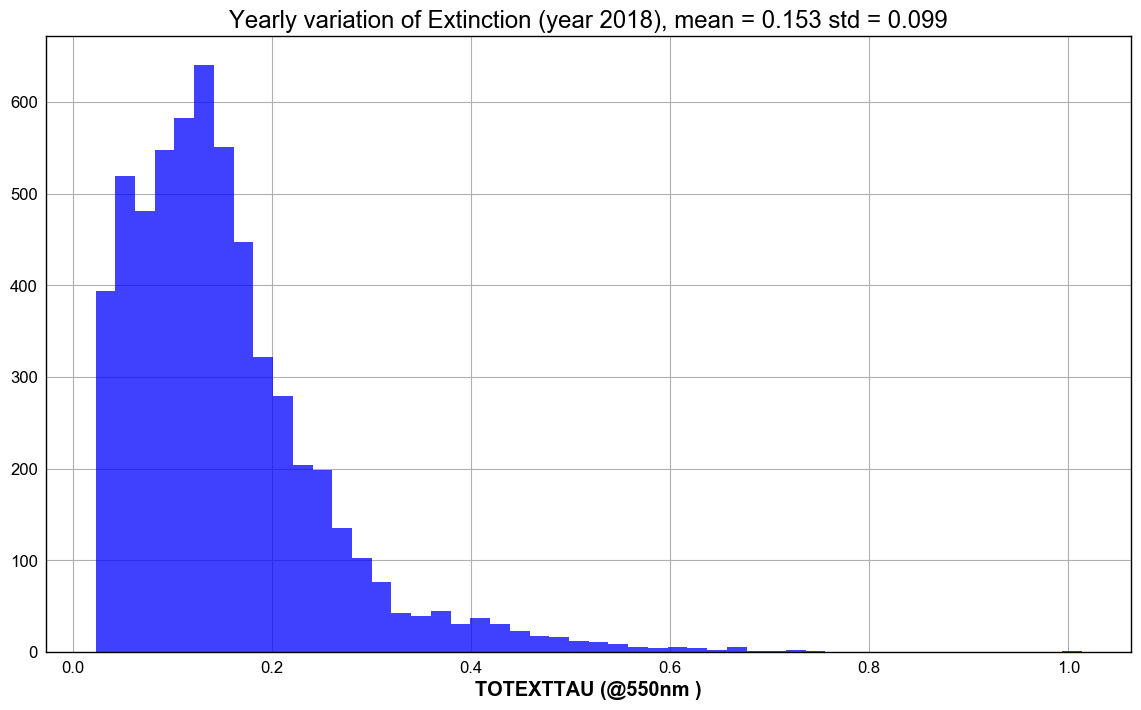

In [44]:
plt.figure(figsize=(14,8))
n, bins, patches = plt.hist(var_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
xtitle=VAR_name+' ('+VAR_unit+' )' 
plt.xlabel(xtitle)
figfilename='Histo_'+VAR_name+'_'+YEARSTR+'_allyear.png'
plt.savefig(figfilename)

# Selection of a period

In [45]:
all_datetime=pd.to_datetime(df_year['time'].get_values())

In [46]:
all_datetime

DatetimeIndex(['2018-01-01 00:30:00', '2018-01-01 01:30:00',
               '2018-01-01 02:30:00', '2018-01-01 03:30:00',
               '2018-01-01 04:30:00', '2018-01-01 05:30:00',
               '2018-01-01 06:30:00', '2018-01-01 07:30:00',
               '2018-01-01 08:30:00', '2018-01-01 09:30:00',
               ...
               '2018-08-31 14:30:00', '2018-08-31 15:30:00',
               '2018-08-31 16:30:00', '2018-08-31 17:30:00',
               '2018-08-31 18:30:00', '2018-08-31 19:30:00',
               '2018-08-31 20:30:00', '2018-08-31 21:30:00',
               '2018-08-31 22:30:00', '2018-08-31 23:30:00'],
              dtype='datetime64[ns]', length=5832, freq=None)

In [47]:
winter_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,1,1),all_datetime<dt.datetime(YEARNUM,3,31)))

In [48]:
summer_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,6,1),all_datetime<dt.datetime(YEARNUM,8,31)))

In [49]:
var_winter=var_year.get_values()[winter_time_index]
var_summer=var_year.get_values()[summer_time_index]

In [50]:
mean_var_winter = np.mean(var_winter)
variance_var_winter = np.var(var_winter)
sigma_var_winter = np.std(var_winter)

In [51]:
mean_var_summer = np.mean(var_summer)
variance_var_summer = np.var(var_summer)
sigma_var_summer = np.std(var_summer)

In [52]:
mw=np.trunc(mean_var_winter*100)/100
sw=np.trunc(sigma_var_winter*100)/100

ms=np.trunc(mean_var_summer*100)/100
ss=np.trunc(sigma_var_summer*100)/100

In [53]:
title = "Yearly variation of {}({}) (year {}), summer : {} +/- {}, winter : {} +/- {}".format(VAR_title,VAR_unit,YEARSTR,ms,ss,mw,sw)

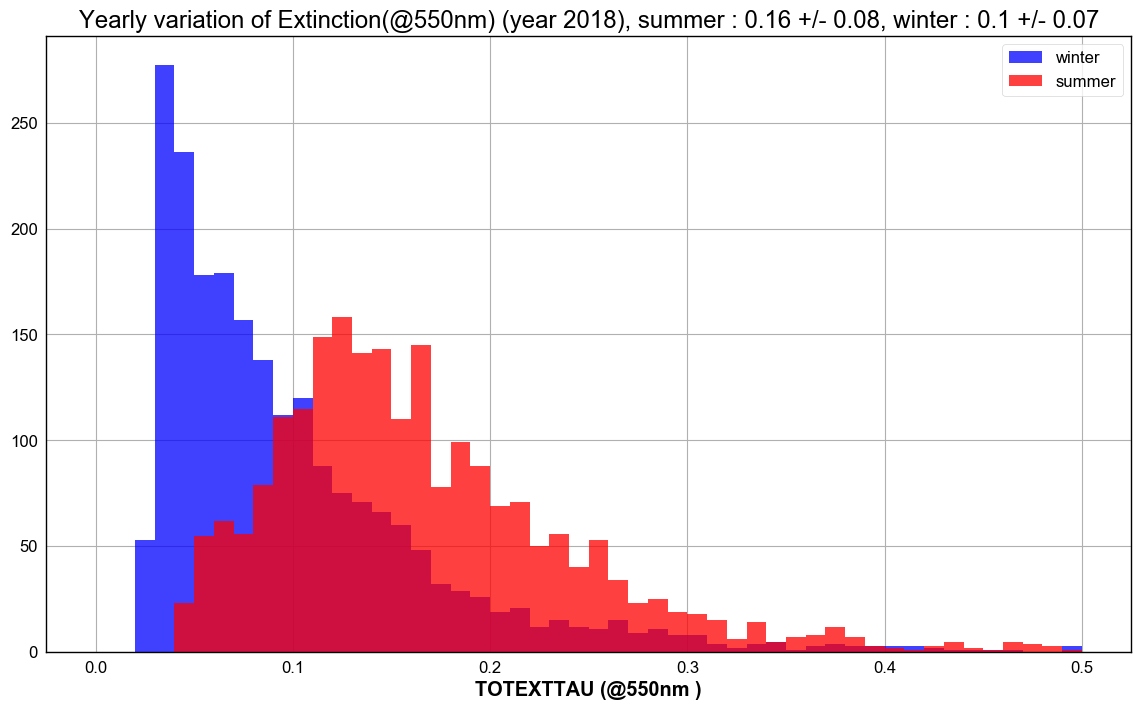

In [54]:
plt.figure(figsize=(14,8))
n, bins, patches = plt.hist(var_winter, 50, range=(VAR_min,VAR_max),normed=False, facecolor='blue', alpha=0.75,label='winter')
n, bins, patches = plt.hist(var_summer, 50, range=(VAR_min,VAR_max),normed=False, facecolor='red', alpha=0.75,label='summer')
plt.title(title)
xtitle=VAR_name+' ('+VAR_unit+' )' 
plt.xlabel(xtitle)
figfilename='Histo_'+VAR_name+'_'+YEARSTR+'_WinterSummer.png'
plt.legend()
plt.savefig(figfilename)